# Project 3

- **Dataset(s) to be used:** https://databank.worldbank.org/reports.aspx?source=2&series=SE.ADT.LITR.ZS&country=#
- **Analysis question:** [question]
- **Columns that will (likely) be used:**
  - [Column 1]
  - [Column 2]
  - [etc]
- (If you're using multiple datasets) **Columns to be used to merge/join them:**
  - [Dataset 1] [column]
  - [Dataset 2] [column]
- **Hypothesis**: [hypothesis]
- **Site URL:** [URL from Publish section]

First I import the libraries that i will be using, then I upload the data and display the first 10 columns to see how it looks, and if I uploaded correctly. 

In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
wb_df = pd.read_csv("/Users/josefinadesolminihac/Downloads/P_Data_Extract_From_World_Development_Indicators (4)/14166b9b-2815-4b64-995f-dcda863a29a5_Data.csv")
wb_df.head(10)

Then, I explore the data and proceed with data cleaning, including changing the types of the different columns.

In [168]:
wb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   6729 non-null   object 
 1   Series Code   6727 non-null   object 
 2   Country Name  6727 non-null   object 
 3   Country Code  6727 non-null   object 
 4   2013          4419 non-null   float64
 5   2014          4489 non-null   float64
 6   2015          4483 non-null   float64
 7   2016          4412 non-null   float64
 8   2017          4078 non-null   float64
 9   2018          4005 non-null   float64
 10  2019          3836 non-null   float64
 11  2020          3765 non-null   float64
 12  2021          3558 non-null   float64
 13  2022          3175 non-null   float64
 14  2023          1529 non-null   float64
dtypes: float64(11), object(4)
memory usage: 789.0+ KB


In [170]:
wb_df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [172]:
#Rename the columns
column_renames = {'2013 [YR2013]':"2013",
                  '2014 [YR2014]':"2014",
                  '2015 [YR2015]':"2015",
                  '2016 [YR2016]':"2016",
                  '2017 [YR2017]':"2017",
                  '2018 [YR2018]':"2018",
                  '2019 [YR2019]':"2019",
                  '2020 [YR2020]':"2020",
                  '2021 [YR2021]':"2021",
                  '2022 [YR2022]':"2022",
                  '2023 [YR2023]':"2023"
                 }
wb_df = wb_df.rename(columns=column_renames)
wb_df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [174]:
#Replace the ".." with NaN
wb_df = wb_df.replace('..', np.nan)

#Convert the columns types to float
columns_to_convert = ['2013','2014', '2015', '2016', '2017', '2018', 
                      '2019', '2020', '2021', '2022', '2023']

wb_df[columns_to_convert] = wb_df[columns_to_convert].astype(float)

In [176]:
#Check if the change in type worked
wb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   6729 non-null   object 
 1   Series Code   6727 non-null   object 
 2   Country Name  6727 non-null   object 
 3   Country Code  6727 non-null   object 
 4   2013          4419 non-null   float64
 5   2014          4489 non-null   float64
 6   2015          4483 non-null   float64
 7   2016          4412 non-null   float64
 8   2017          4078 non-null   float64
 9   2018          4005 non-null   float64
 10  2019          3836 non-null   float64
 11  2020          3765 non-null   float64
 12  2021          3558 non-null   float64
 13  2022          3175 non-null   float64
 14  2023          1529 non-null   float64
dtypes: float64(11), object(4)
memory usage: 789.0+ KB


In [178]:
#See what are the indicators that I have in the dataframe
wb_df['Series Name'].unique()

array(['Literacy rate, adult total (% of people ages 15 and above)',
       'GDP per capita (current US$)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Fertility rate, total (births per woman)', 'GDP (current US$)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'Primary completion rate, male (% of relevant age group)',
       'Primary completion rate, female (% of relevant age group)',
       'School enrollment, preprimary (% gross)',
       'School enrollment, preprimary, female (% gross)',
       'School enrollment, preprimary, male (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, primary, female (% gross)',
       'School enrollment, primary, male (% gross)',
       'School enrollment, secondary (% g

I will now begin the analysis. Since I want to compare GDP per capita with several indicators, I created a function that allows me to select the indicator I want to focus on. This function creates a new DataFrame containing only the data for that specific indicator (I will explain each step with the "GDP per capita (current US$) indicator)

Next, I will merge the DataFrames for the selected indicators and use scatterplots to visualize the relationships between GDP per capita and each indicator. I will also compare how these relationships have changed from 2013 to 2022.

The first analysis I will do will be between GDP per cápita and Adolescent fertility rate (births per 1,000 women ages 15-19)

In [187]:
# Firts I set the indicator I want to focus on, in this case, GDP per capita in current US dollars.
indicator_name = "GDP per capita (current US$)"

#I create the function, that will take two arguments: the dataframe and the indicator.
def indicator_df(df, indicator_name):
    #I Filter the data to only include rows where the Series Name matches the indicator_name. 
    new_df = df[df['Series Name'] == indicator_name]
    #Selects only the relevant columns
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    #I use melt to reshape the data
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    #chamnge the type of the new Year column to integer
    new_df["Year"] = new_df["Year"].astype(int)
    #returns the new dataframe
    return new_df

gdp_df = indicator_df(wb_df, indicator_name)
gdp_df

,Country Name,Country Code,Year,GDP per capita (current US$)
0,Afghanistan,AFG,2013,638.733181
1,Albania,ALB,2013,4413.063383
2,Algeria,DZA,2013,6044.674903
3,American Samoa,ASM,2013,12038.871592
4,Andorra,AND,2013,44747.753864
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,3367.606990
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,1369.129365


In [193]:
#I use the same function but with a new indicator
indicator_name = "Adolescent fertility rate (births per 1,000 women ages 15-19)"

def indicator_df(df, indicator_name):
    new_df = df[df['Series Name'] == indicator_name]
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    new_df["Year"] = new_df["Year"].astype(int)
    return new_df

adfertility = indicator_df(wb_df, indicator_name)
adfertility

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,Afghanistan,AFG,2013,106.537
1,Albania,ALB,2013,20.865
2,Algeria,DZA,2013,12.684
3,American Samoa,ASM,2013,43.498
4,Andorra,AND,2013,6.989
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,NaN
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,NaN


In [191]:
gdp_avg = gdp_df.groupby("Year")["GDP per capita (current US$)"].mean().to_frame(name="GDP per capita (current US$)").reset_index()
gdp_avg

,Year,GDP per capita (current US$)
0,2013,18210.153226
1,2014,18568.556488
2,2015,16773.566681
3,2016,17148.992326
4,2017,18008.789722
5,2018,19091.105496
6,2019,19032.129903
7,2020,17642.386604
8,2021,20342.934386
9,2022,20442.969319


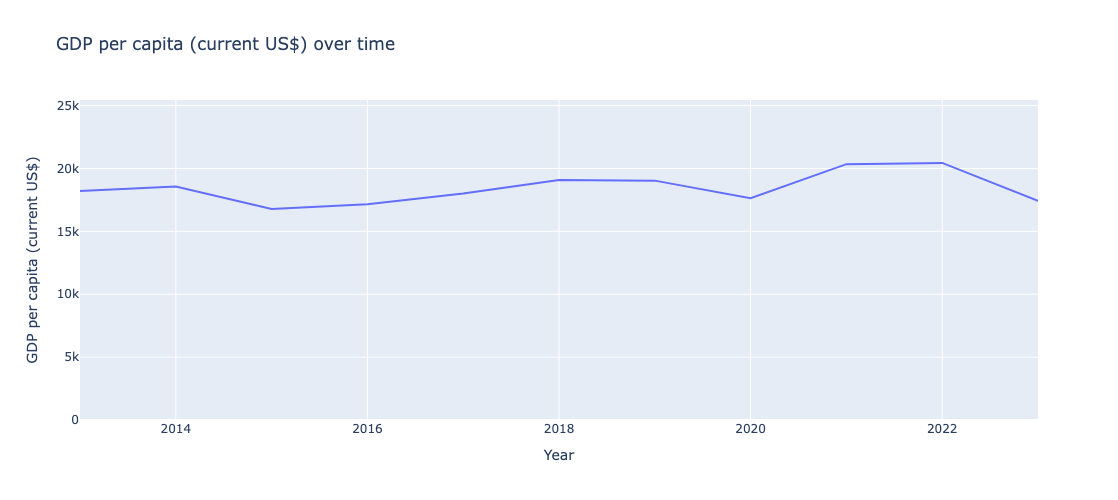

In [201]:
fig1 = px.line(
    gdp_avg,
    x="Year",
    y= "GDP per capita (current US$)",
    title="GDP per capita (current US$) over time",
    width=900,     
    height=500)

fig1.update_layout(
    yaxis=dict(range=[0, gdp_avg["GDP per capita (current US$)"].max() + 5000]) 
)
fig1.show()

In [105]:
adfertility_avg = adfertility.groupby("Year")["Adolescent fertility rate (births per 1,000 women ages 15-19)"].mean().to_frame(name="Adolescent fertility rate (births per 1,000 women ages 15-19)").reset_index()
adfertility_avg

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,2013,50.909062
1,2014,49.810257
2,2015,48.435541
3,2016,46.956696
4,2017,45.542446
5,2018,44.503508
6,2019,43.676893
7,2020,42.691989
8,2021,42.054922
9,2022,41.253120


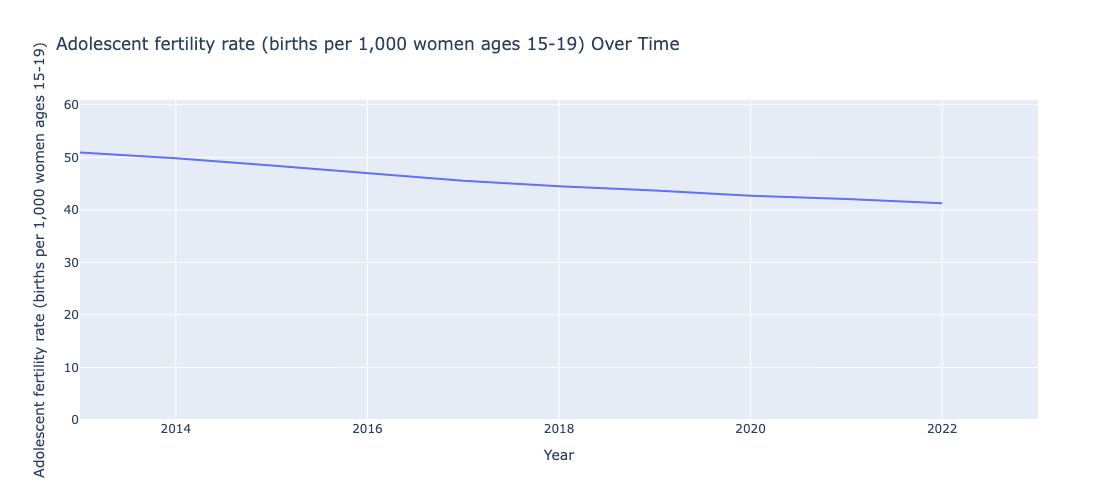

In [205]:
fig1 = px.line(
    adfertility_avg,
    x="Year",
    y= "Adolescent fertility rate (births per 1,000 women ages 15-19)",
    title='Adolescent fertility rate (births per 1,000 women ages 15-19) Over Time',
    width=900,     
    height=500)

fig1.update_layout(
    yaxis=dict(range=[0, adfertility_avg["Adolescent fertility rate (births per 1,000 women ages 15-19)"].max() + 10]) 
)
fig1.show()

In [53]:
Year = 2013
gdp_year = gdp_df[gdp_df["Year"] == Year]
adfertility_year = adfertility[adfertility["Year"] == Year]
merged_13 = pd.merge(gdp_year, adfertility_year[["Country Name", "Adolescent fertility rate (births per 1,000 women ages 15-19)"]], on = "Country Name", how = "left")
merged_13

,Country Name,Country Code,Year,GDP per capita (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,Afghanistan,AFG,2013,638.733181,106.537
1,Albania,ALB,2013,4413.063383,20.865
2,Algeria,DZA,2013,6044.674903,12.684
3,American Samoa,ASM,2013,12038.871592,43.498
4,Andorra,AND,2013,44747.753864,6.989
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,2013,34597.976694,42.395
213,West Bank and Gaza,PSE,2013,3315.297539,53.427
214,"Yemen, Rep.",YEM,2013,1497.747941,68.876
215,Zambia,ZMB,2013,1840.320553,131.696


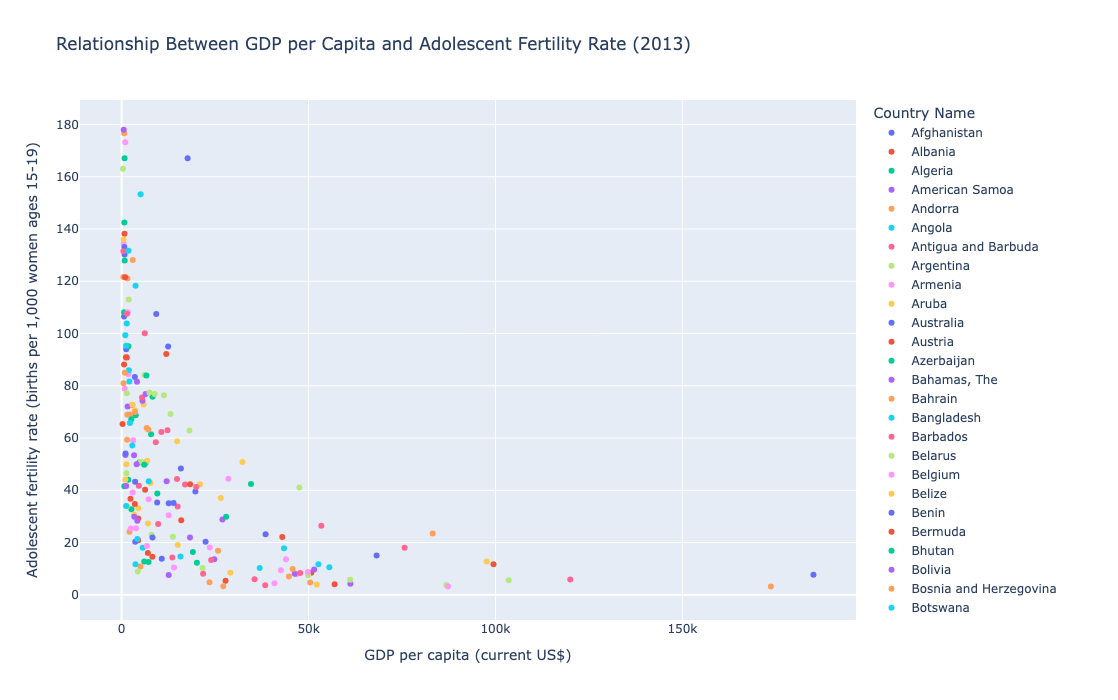

In [69]:
scatterplot_gdp_fertility = px.scatter(merged_13, 
                            x="GDP per capita (current US$)", 
                            y="Adolescent fertility rate (births per 1,000 women ages 15-19)", 
                            color="Country Name",
                            title = "Relationship Between GDP per Capita and Adolescent Fertility Rate (2013)",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_fertility.show()

In [ ]:
adfertility_avg = adfertility.groupby("Year")["Adolescent fertility rate (births per 1,000 women ages 15-19)"].mean().to_frame(name="Adolescent fertility rate (births per 1,000 women ages 15-19)").reset_index()
adfertility_avg

In [81]:
Year = 2022
gdp_year = gdp_df[gdp_df["Year"] == Year]
adfertility_year = adfertility[adfertility["Year"] == Year]
merged_22 = pd.merge(gdp_year, adfertility_year[["Country Name", "Adolescent fertility rate (births per 1,000 women ages 15-19)"]], on = "Country Name", how = "left")
merged_22

,Country Name,Country Code,Year,GDP per capita (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,Afghanistan,AFG,2022,352.603733,79.735
1,Albania,ALB,2022,6810.114041,14.460
2,Algeria,DZA,2022,5023.252932,11.564
3,American Samoa,ASM,2022,19673.390102,29.989
4,Andorra,AND,2022,42350.697069,5.910
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,2022,NaN,29.905
213,West Bank and Gaza,PSE,2022,3799.955270,42.901
214,"Yemen, Rep.",YEM,2022,NaN,52.497
215,Zambia,ZMB,2022,1456.901570,116.091


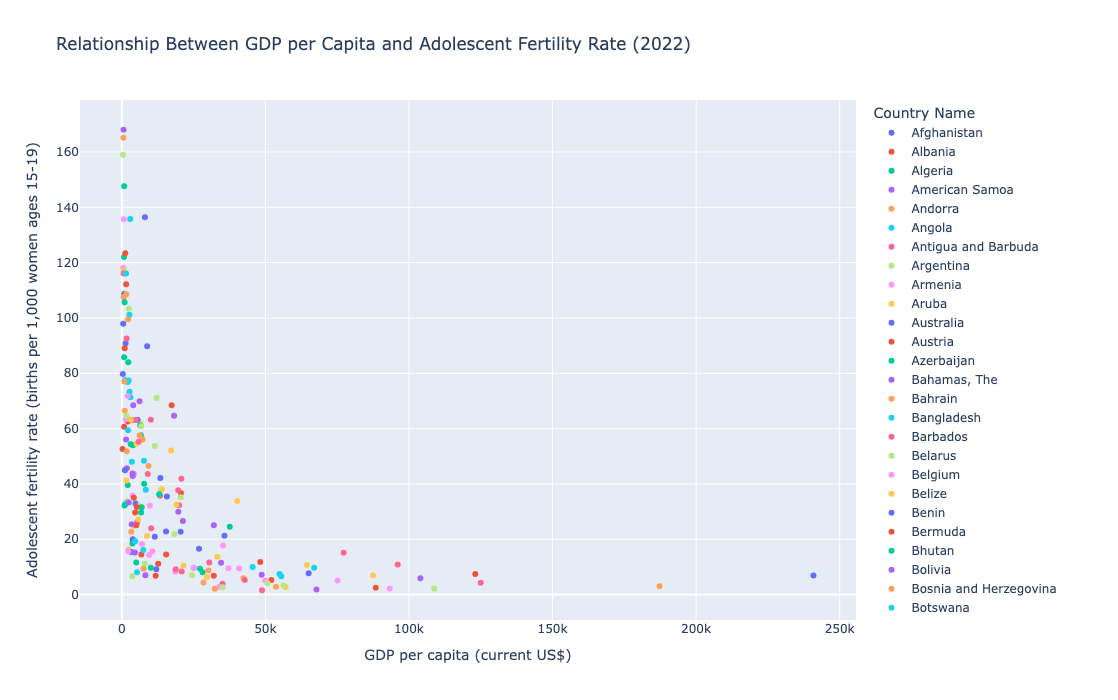

In [83]:
scatterplot_gdp_fertility2 = px.scatter(merged_22, 
                            x="GDP per capita (current US$)", 
                            y="Adolescent fertility rate (births per 1,000 women ages 15-19)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Adolescent Fertility Rate (2022)",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_fertility2.show()

In [143]:
indicator_name = "Life expectancy at birth, total (years)"

def indicator_df(df, indicator_name):
    new_df = df[df['Series Name'] == indicator_name]
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    new_df["Year"] = new_df["Year"].astype(int)
    return new_df

lifeexpectancy = indicator_df(wb_df, indicator_name)
lifeexpectancy

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,2013,62.417
1,Albania,ALB,2013,78.123
2,Algeria,DZA,2013,74.615
3,American Samoa,ASM,2013,NaN
4,Andorra,AND,2013,NaN
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,NaN
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,NaN


In [145]:
lifeexpectancy_avg = lifeexpectancy.groupby("Year")["Life expectancy at birth, total (years)"].mean().to_frame(name="Life expectancy at birth, total (years)").reset_index()
lifeexpectancy_avg

,Year,"Life expectancy at birth, total (years)"
0,2013,71.530266
1,2014,71.798805
2,2015,72.000067
3,2016,72.301777
4,2017,72.522846
5,2018,72.719711
6,2019,72.928560
7,2020,72.304577
8,2021,71.755376
9,2022,72.416519


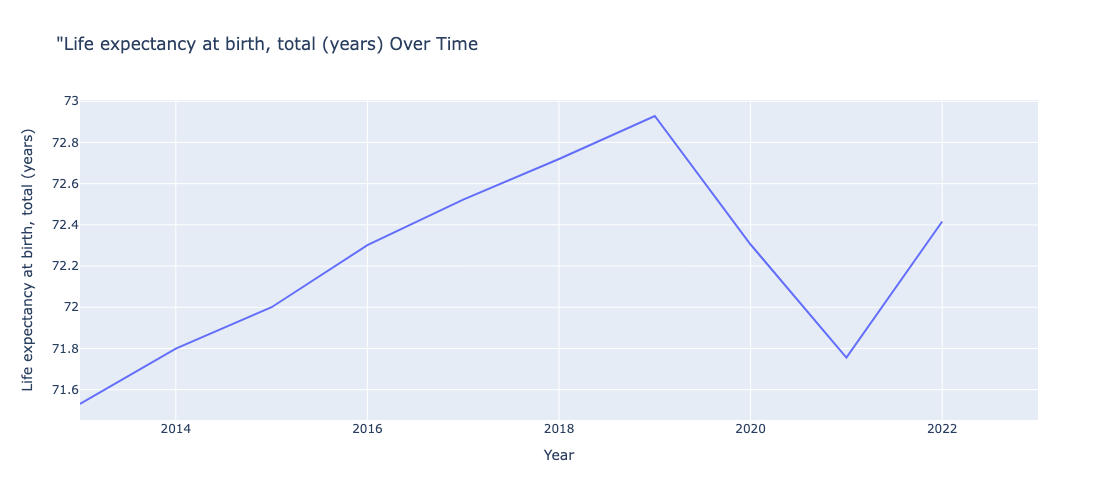

In [147]:
fig1 = px.line(
    lifeexpectancy_avg,
    x="Year",
    y= "Life expectancy at birth, total (years)",
    title='"Life expectancy at birth, total (years) Over Time',
    width=900,     
    height=500)
fig1

In [149]:
Year = 2013
gdp_year = gdp_df[gdp_df["Year"] == Year]
lifeexpectancy_year = lifeexpectancy[lifeexpectancy["Year"] == Year]
merged_gdp_lifeex_13 = pd.merge(gdp_year, lifeexpectancy_year[["Country Name", "Life expectancy at birth, total (years)"]], on = "Country Name", how = "left")
merged_gdp_lifeex_13

,Country Name,Country Code,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,2013,638.733181,62.417000
1,Albania,ALB,2013,4413.063383,78.123000
2,Algeria,DZA,2013,6044.674903,74.615000
3,American Samoa,ASM,2013,12038.871592,NaN
4,Andorra,AND,2013,44747.753864,NaN
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,2013,34597.976694,78.717073
213,West Bank and Gaza,PSE,2013,3315.297539,74.029000
214,"Yemen, Rep.",YEM,2013,1497.747941,67.545000
215,Zambia,ZMB,2013,1840.320553,59.878000


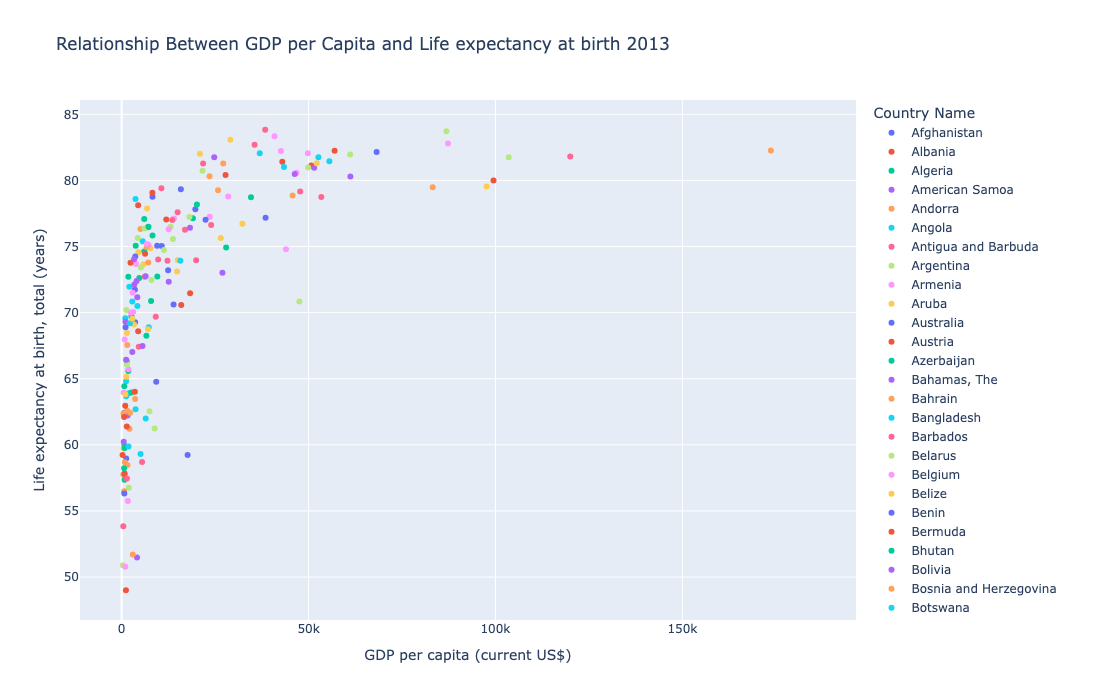

In [151]:
scatterplot_gdp_lifeexp = px.scatter(merged_gdp_lifeex_13, 
                            x="GDP per capita (current US$)", 
                            y="Life expectancy at birth, total (years)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Life expectancy at birth 2013",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_lifeexp.show()


In [153]:
Year = 2022
gdp_year = gdp_df[gdp_df["Year"] == Year]
lifeexpectancy_year = lifeexpectancy[lifeexpectancy["Year"] == Year]
merged_gdp_lifeex_22 = pd.merge(gdp_year, lifeexpectancy_year[["Country Name", "Life expectancy at birth, total (years)"]], on = "Country Name", how = "left")
merged_gdp_lifeex_22

,Country Name,Country Code,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,2022,352.603733,62.879000
1,Albania,ALB,2022,6810.114041,76.833000
2,Algeria,DZA,2022,5023.252932,77.129000
3,American Samoa,ASM,2022,19673.390102,NaN
4,Andorra,AND,2022,42350.697069,NaN
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,2022,NaN,80.319512
213,West Bank and Gaza,PSE,2022,3799.955270,73.444000
214,"Yemen, Rep.",YEM,2022,NaN,63.720000
215,Zambia,ZMB,2022,1456.901570,61.803000


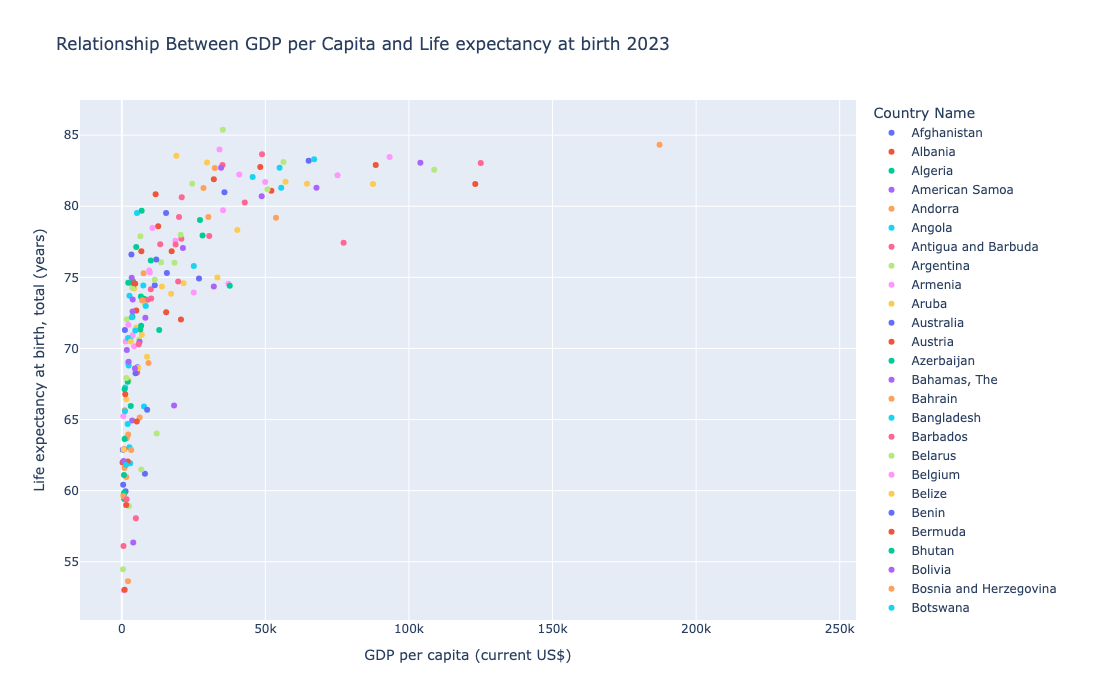

In [155]:
scatterplot_gdp_lifeexp2 = px.scatter(merged_gdp_lifeex_22, 
                            x="GDP per capita (current US$)", 
                            y="Life expectancy at birth, total (years)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Life expectancy at birth 2023",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_lifeexp2.show()

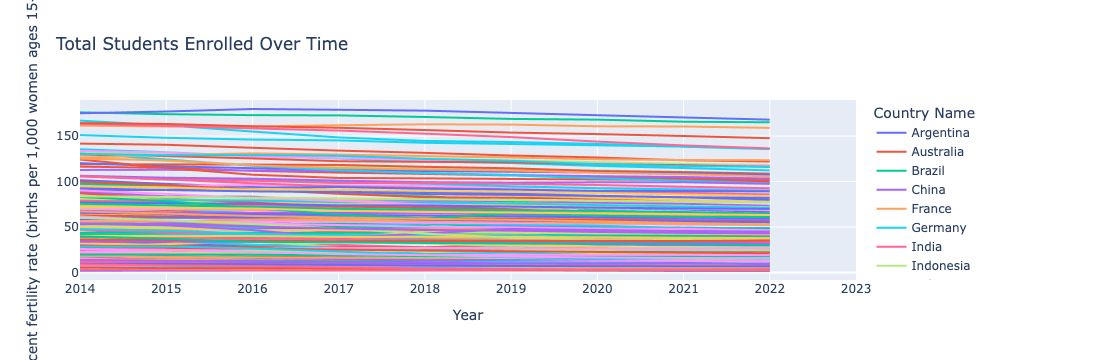

In [244]:
fig1 = px.line(
    adfertility_name,
    x="Year",
    y="Adolescent fertility rate (births per 1,000 women ages 15-19)",
    color = "Country Name",
    title='Total Students Enrolled Over Time')
fig1